In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 30)
df = pd.read_csv('churn (1).csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [3]:
df.shape

(7043, 21)

In [4]:
df.drop(['customerID'],axis=1,inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Churn']=lb.fit_transform(df['Churn'])

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

22

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges        Churn
count    7021.000000  7021.000000     7021.000000  7021.000000
mean        0.162512    32.469449       64.851894     0.264492
std         0.368947    24.534965       30.069001     0.441094
min         0.000000     0.000000       18.250000     0.000000
25%         0.000000     9.000000       35.750000     0.000000
50%         0.000000    29.000000       70.400000     0.000000
75%         0.000000    55.000000       89.900000     1.000000
max         1.000000    72.000000      118.750000     1.000000

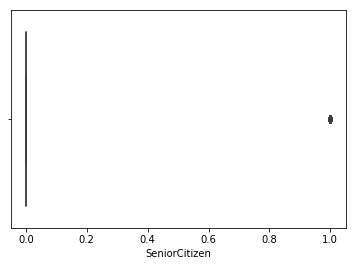

In [10]:
sns.boxplot(df['SeniorCitizen']);

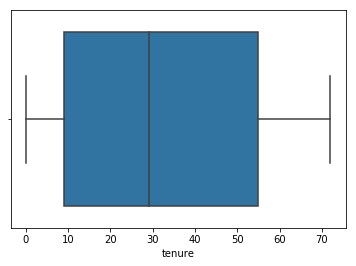

In [11]:
sns.boxplot(df['tenure']);

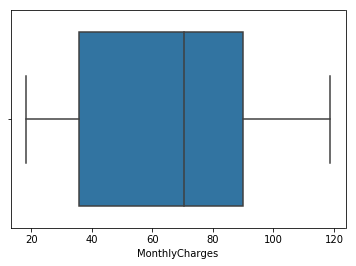

In [12]:
sns.boxplot(df['MonthlyCharges']);

In [13]:
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()])

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [14]:
df1 = df[df['TotalCharges'].str[0:10] == ' ']

In [15]:
df = df[df['TotalCharges'].str[0:10] != ' ']

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [18]:
df_num = df[df.select_dtypes(include=np.number).columns]
df_cat = df[df.select_dtypes(include='object').columns]
df_dummy= pd.get_dummies(df_cat,drop_first=True)# drop first equal true
data =pd.concat([df_num,df_dummy],axis=1)
data.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0            0   
1              0      34           56.95       1889.50      0            1   
2              0       2           53.85        108.15      1            1   
3              0      45           42.30       1840.75      0            1   
4              0       2           70.70        151.65      1            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0                  0   
3                               1                  0   
4                               0                  0   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4                            1                   0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
0                                   0                   0  ...   
1                                   0                   1  ...   
2                                   0                   1  ...   
3                                   0                   1  ...   
4                                   0                   0  ...   

   OnlineBackup_Yes  DeviceProtection_No internet service  \
0                 1                                     0   
1                 0                                     0   
2                 1                                     0   
3                 0                                     0   
4                 0                                     0   

   DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  \
0                     0                                0                0   
1                     1                                0                0   
2                     0                                0                0   
3                     1                                0                1   
4                     0                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2  

In [19]:
data.shape

(7010, 31)

In [20]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [21]:
x= data.drop(['Churn'],axis=1)
y= data['Churn']

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=7)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.724679029957204


In [24]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

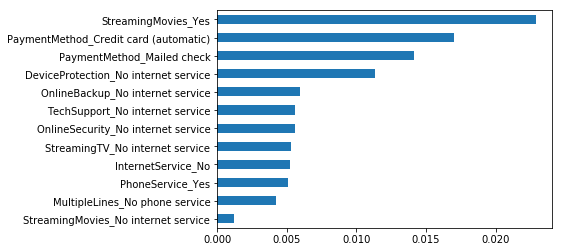

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nsmallest(12).plot(kind='barh')
plt.show()

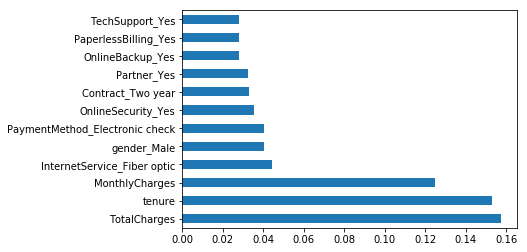

In [26]:
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [27]:
max_depth_range = list(range(1, 25))
accuracy = []
for depth in max_depth_range:
    dt = DecisionTreeClassifier(max_depth = depth,random_state = 0)
    dt.fit(x_train,y_train)
    score = dt.score(x_test, y_test)
    accuracy.append(score)
accuracy
    

[0.7375178316690443,
 0.7979077508321446,
 0.7979077508321446,
 0.7893485496909177,
 0.7860199714693296,
 0.7879220161673799,
 0.7822158820732287,
 0.7836424155967665,
 0.7769852591535901,
 0.7684260580123633,
 0.7622444127436995,
 0.7584403233475987,
 0.7451260104612458,
 0.7451260104612458,
 0.7398953875416072,
 0.7346647646219686,
 0.7370423204945317,
 0.738944365192582,
 0.7379933428435568,
 0.727056585829767,
 0.7303851640513552,
 0.7337137422729434,
 0.727056585829767,
 0.738944365192582]

In [28]:
import graphviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [29]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())

In [30]:
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.756185 to fit



In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
depth = np.arange(1,30)
leaves = [1,2,4,5,10,20,30,40,80,100]
param_grid =[{'criterion':['entropy','gini'],'splitter':['best','random'],
              'max_depth':depth,
             'min_samples_leaf':leaves}]
grid_search = GridSearchCV(estimator=dt,param_grid=param_grid, scoring='accuracy',cv=10)
grid_search = grid_search.fit(x_train, y_train)

In [33]:
accuracy = grid_search.best_score_

In [34]:
accuracy

0.802323211738333

In [35]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 80,
 'splitter': 'best'}

Drawback : GridSearchCV will go through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive

## RandomizedSearchCV
RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters. This approach reduces unnecessary computation.

In [36]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV 

In [37]:
param_dist = {"max_depth":depth, 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]}
param_dist1 = {"max_depth":depth, 
              'max_features': ['auto', 'sqrt', 'log2'], 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]}

In [38]:
tree_cv = RandomizedSearchCV(dt, param_dist, cv = 5)

In [39]:
tree_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=24,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=0,
                                                    splitter='best'),
   

In [40]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 1}
Best score is 0.7733849602608518


In [41]:
tree_cv = RandomizedSearchCV(dt, param_dist1, cv = 5)
tree_cv.fit(x_train, y_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4}
Best score is 0.7817403708987162


# Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn import *

In [66]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7289586305278174


In [67]:
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
dt1 = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7370423204945317


In [68]:
scaler1 = preprocessing.RobustScaler()
x_train = scaler1.fit_transform(x_train)
x_test = scaler1.transform(x_test)
dt2 = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7356157869709938


## Post pruning decision trees with cost complexity pruning
.. currentmodule:: sklearn.tree

The :class:DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

See also minimal_cost_complexity_pruning for details on pruning

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
path = dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

AttributeError: 'DecisionTreeClassifier' object has no attribute 'cost_complexity_pruning_path'

In [ ]:
ccp_alphas

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases

In [ ]:
## Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of :class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impuritie